In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

# LAX Weather in 2019

In [3]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('laxweather.csv')

We are cleaning and organizing the data to have a column in datetime to have a legible dataset for visuals and models. 

## Cleaning the dataset

In [4]:
df['date']= pd.date_range(start='1/1/2019', end='12/31/2019')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [7]:
df['season'] = df.date.map(season_of_date)

In [8]:
df['month'] = df['date'].dt.month

In [9]:
df['date'] = pd.to_datetime(df['date'])

Unlike the JFK and EWR dataset there is no column for 'PrecipAccumulation' as it does not snow in Los Angeles.

In [13]:
df['icon'].value_counts()

partly-cloudy-day    162
clear-day            134
rain                  62
cloudy                 7
Name: icon, dtype: int64

# Visuals

In [14]:
rain = df.groupby('season').agg({'precipProbability': ['mean']})
rain

,precipProbability
,mean
season,
1,0.377111
2,0.156854
3,0.065532
4,0.158043


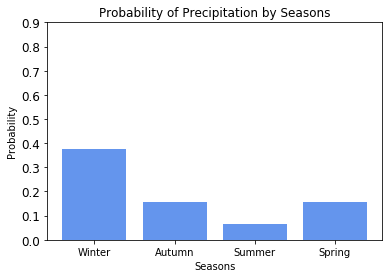

In [15]:
avgrain(rain)

 Los Angeles climate is categorized as a Mediterranean climate indicated seasons changes in rainfall. According to the visual we can see there is a higher chance of rain in the Winter season. This is because winter is wet season in Southern California and therefore summers are dry and wet winters..

In [16]:
df['avgtemp']= df[['temperatureMax','temperatureMin']].mean(axis=1)

In [17]:
temp = df.groupby('season').agg({'avgtemp': ['mean']})
temp

,avgtemp
,mean
season,
1,57.080889
2,65.383820
3,70.158085
4,62.578913


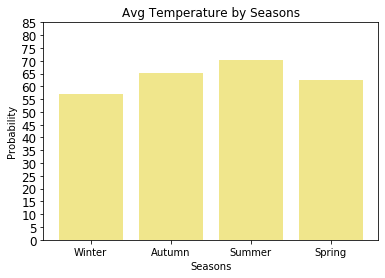

In [18]:
avgtemp(temp)

Interesting enough because of Los Angeles climate we can the average temperate never reaches freezing due to is Mediterranean climate.

# Analysis of Weather Delays